In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
root_path = 'dataset/'
train = pd.read_csv('%s%s' % (root_path, 'train.csv'))
test = pd.read_csv('%s%s' % (root_path, 'test.csv'))

In [3]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 返回每列列名，该列非nan值的个数，以及该列的数据类型
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


survival	生存	0 = No, 1 = Yes     
pclass	票类别-社会地位	1 = 1st, 2 = 2nd, 3 = 3rd    
sex	性别	   
Age	年龄	   
sibsp	兄弟姐妹/配偶	   
parch	父母/孩子的数量	  
ticket	票号	 
fare	乘客票价    	
cabin	客舱号码	  
embarked	登船港口	C=Cherbourg, Q=Queenstown, S=Southampton   

In [5]:
test.info() # 测试集中无乘客是否存活的信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


由上面信息可得，年龄、客仓号码和登船港口特征列有缺失值

In [7]:
# 返回数值型变量的统计量
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 ### 特征分析(绘图)

In [9]:
# 计算相关性协方差表，返回结果接近0说明无相关性，大于0为正相关，小于0为负相关
train_corr = train.drop('PassengerId', axis=1).corr()
train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


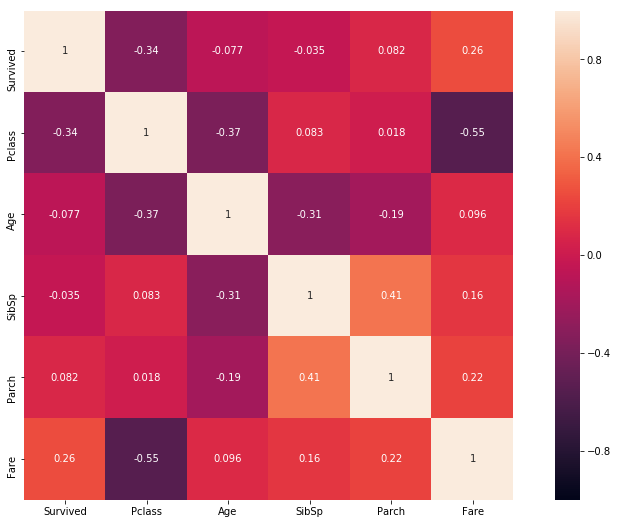

In [10]:
# 画出相关性热力图
p = plt.subplots(figsize=(15,9)) # 调整画布大小
p = sns.heatmap(train_corr, vmin=-1, vmax=1, annot=True, square=True)

* 分析Pclass，乘客等级与存活之间的关系

In [11]:
train.groupby(['Pclass'])['Pclass', 'Survived'].mean()

,Pclass,Survived
Pclass,,
1,1.0,0.629630
2,2.0,0.472826
3,3.0,0.242363


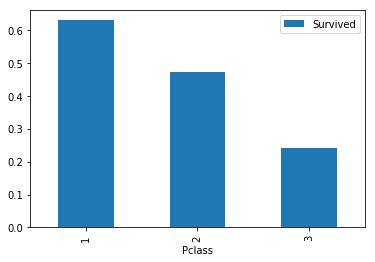

In [12]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().plot.bar()

当Pclass=1时的存活率在0.5以上，所以最终模型中应包含该特征

* 分析Sex性别特征

In [14]:
train.groupby(['Sex'])['Sex', 'Survived'].mean()

,Survived
Sex,
female,0.742038
male,0.188908


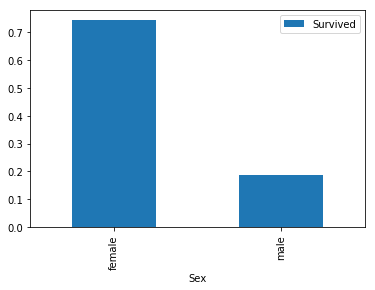

In [15]:
train[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar()

女性有较高的存活率，保留该特征

* 分析特征SibSp and Parch 兄妹配偶数和父母子女数

In [17]:
train[['SibSp','Survived']].groupby(['SibSp']).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


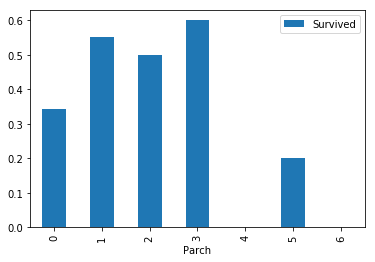

In [18]:
train[['Parch', 'Survived']].groupby(['Parch']).mean().plot.bar()

这些特征没有具体的某个值与存活有特别明显的相关性，可以根据这些特征构造出新的特征

* Age年龄特征分析

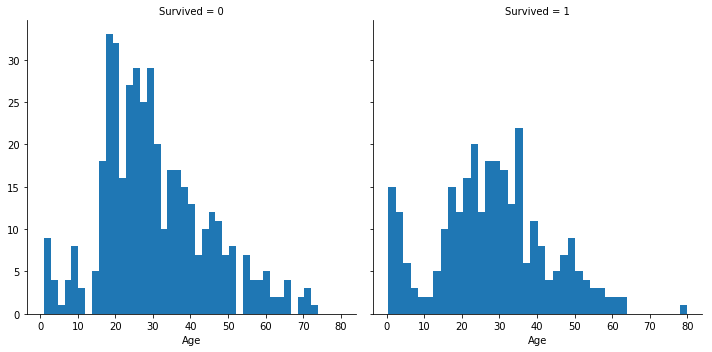

In [27]:
a = sns.FacetGrid(train, col='Survived', size=5)
a.map(plt.hist, 'Age', bins=40)

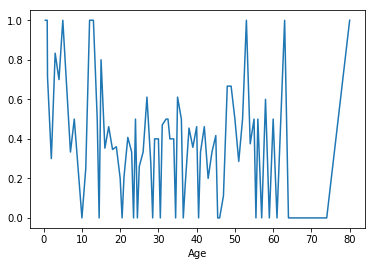

In [28]:
train.groupby(['Age'])['Survived'].mean().plot()

年龄对存活分布影响较大，但是存在缺失值，需要填充或模型预测

* Embarked登船港口特征分析

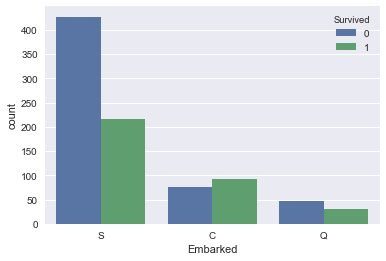

In [30]:
sns.set(style='darkgrid')
sns.countplot('Embarked', hue='Survived', data=train)

C港的存活率更高，这个特征也应该保留

* 其他特征    
    * 数据的Name特征包含了乘客的年龄、性别和社会地位等信息，但是无法用图表表现出类，在特征工程中应再考虑     
    * 还有船票价格、船舱号和船票号三个特征，这三个特征仍应该和存活分布有很大的影响

### 特征工程

In [41]:
# 先将训练集合并一起做特征工程（但是标准化的时候需要分开处理）
# 将test测试集补齐（因为缺少存活信息）然后在合并
test['Survived'] = 0
train_test = train.append(test, sort=False)

#### 特征处理

* Pclass 乘客等级，共有三个取值，1时最高级

In [42]:
# 直接保留
# 对Pclass特征进行one-hot编码
train_test = pd.get_dummies(train_test, columns=['Pclass'])

* Sex 性别，无缺失值，直接保留

In [43]:
# 进行one-hot编码
train_test = pd.get_dummies(train_test, columns=['Sex'])

* SibSp and Parch 兄妹配偶数和父母子女数

In [45]:
# 这两个特征都是数值型特征，可以将两个特征的值相加代表该乘客在船上认识的人的总数作为一个新的特征
train_test['SibSp_Parch'] = train_test['SibSp'] + train_test['Parch']
train_test = pd.get_dummies(train_test, columns=['SibSp', 'Parch', 'SibSp_Parch'])

* Embarked 港口特征有极少量的缺失值，在one-hot编码时缺失值可以直接填充为0，也可以使用测试集的众数进行填充

In [46]:
train_test = pd.get_dummies(train_test, columns=['Embarked'])